In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline


In [2]:
#sklearn implementation of the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Train Test Split


In [3]:
from sklearn.model_selection import train_test_split

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


### Explore Dataset

In [4]:
df = pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\angelo avila - insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [39]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type', ylabel='count'>

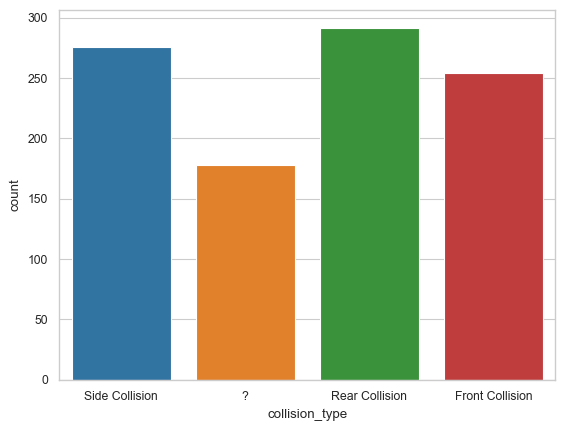

In [38]:
sns.countplot(data = df, x = "collision_type")

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [9]:
to_drop = ['auto_make','policy_csl','auto_model']
df.drop(to_drop,axis=1,inplace=True)

In [40]:
cat_cols = ['police_report_available','property_damage','authorities_contacted','insured_education_level','insured_occupation','insured_hobbies','incident_type','insured_relationship','incident_severity','insured_sex','fraud_reported']
df1 = pd.get_dummies(df,columns = cat_cols)

### Pre-Processing

In [41]:
#Separate the Features and the Target Variable
x = df1.drop(["collision_type"], axis=1)
y = df1["collision_type"]

In [42]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [43]:
#NOTE: Only scale the predictor variables, NOT the target variable

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

### Training Model

In [44]:
#Instantiate the Algorithm 
gnb = GaussianNB()

#Train the model
gnb.fit(x_train_scaled,y_train)


GaussianNB()

### Validate Model

In [45]:
#Predict on the Test Set
y_pred = gnb.predict(x_test_scaled)

y_pred


array(['Front Collision', 'Rear Collision', 'Front Collision',
       'Front Collision', 'Rear Collision', 'Side Collision',
       'Rear Collision', '?', 'Front Collision', 'Rear Collision',
       'Side Collision', 'Front Collision', 'Front Collision',
       'Rear Collision', 'Side Collision', 'Front Collision',
       'Rear Collision', '?', 'Rear Collision', 'Front Collision',
       'Side Collision', 'Front Collision', 'Rear Collision',
       'Side Collision', '?', 'Rear Collision', 'Front Collision', '?',
       'Rear Collision', '?', 'Rear Collision', 'Front Collision',
       'Rear Collision', 'Side Collision', 'Rear Collision',
       'Side Collision', 'Rear Collision', 'Side Collision',
       'Side Collision', 'Rear Collision', 'Front Collision',
       'Rear Collision', 'Rear Collision', 'Rear Collision',
       'Rear Collision', 'Rear Collision', 'Rear Collision', '?', '?',
       'Side Collision', 'Front Collision', 'Front Collision', '?',
       'Rear Collision', '?', '

In [46]:
#Check performance metrics
print("Accuracy: {:.2%}".format(accuracy_score(y_test,y_pred)))

Accuracy: 45.20%


In [47]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

              ?       1.00      1.00      1.00        50
Front Collision       0.28      0.31      0.30        54
 Rear Collision       0.29      0.33      0.31        73
 Side Collision       0.39      0.30      0.34        73

       accuracy                           0.45       250
      macro avg       0.49      0.49      0.49       250
   weighted avg       0.46      0.45      0.45       250



In [48]:
print (confusion_matrix(y_test, y_pred))

[[50  0  0  0]
 [ 0 17 26 11]
 [ 0 25 24 24]
 [ 0 18 33 22]]


In [49]:
#Get probabilities
y_prob_df = pd.DataFrame(gnb.predict_proba(x_test_scaled), index=x_test.index, columns=gnb.classes_)

In [50]:
gnb.classes_

array(['?', 'Front Collision', 'Rear Collision', 'Side Collision'],
      dtype='<U15')

In [51]:
y_prob_df

,?,Front Collision,Rear Collision,Side Collision
923,0.00,0.80,0.07,0.13
921,0.00,0.04,0.95,0.01
516,0.00,1.00,0.00,0.00
87,0.00,0.74,0.01,0.25
879,0.00,0.00,0.88,0.12
463,0.00,0.00,0.13,0.87
112,0.00,0.00,0.99,0.01
297,1.00,0.00,0.00,0.00
417,0.00,0.97,0.00,0.03
658,0.00,0.03,0.93,0.04


In [52]:
#View original test dataset with results for easier analysis
df_results = x_test.copy()
df_results['Class'] = y_test
df_results['Predicted'] = y_pred
new_df = df_results.join(y_prob_df)

new_df.head(10)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,police_report_available_?,police_report_available_NO,police_report_available_YES,property_damage_?,property_damage_NO,property_damage_YES,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,insured_sex_FEMALE,insured_sex_MALE,fraud_reported_N,fraud_reported_Y,Class,Predicted,?,Front Collision,Rear Collision,Side Collision
923,90,31,524215,2000,951.27,0,42100,0,2,1,1,0,75790,13780,6890,55120,2007,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,Rear Collision,Front Collision,0.00,0.80,0.07,0.13
921,178,38,987524,500,1381.14,0,0,0,10,3,0,3,57200,5200,10400,41600,2011,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,Rear Collision,Rear Collision,0.00,0.04,0.95,0.01
516,65,27,538955,1000,1164.97,0,43000,-42500,17,1,1,2,42840,3570,7140,32130,2004,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,Front Collision,Front Collision,0.00,1.00,0.00,0.00
87,134,32,614763,500,1612.43,0,36400,0,2,1,2,1,64240,11680,11680,40880,2015,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,Side Collision,Front Collision,0.00,0.74,0.01,0.25
879,338,47,884180,500,1143.46,4000000,0,0,4,1,2,1,58560,9760,9760,39040,2002,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,Front Collision,Rear Collision,0.00,0.00,0.88,0.12
463,218,41,461962,500,914.22,0,37900,-72900,14,3,2,0,84590,15380,7690,61520,2013,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,Side Collision,Side Collision,0.00,0.00,0.13,0.87
112,210,41,395269,500,1222.75,0,0,-41000,12,3,2,0,81070,14740,14740,51590,20